# <b> <span style='color:#0386f7de'>|</span> Importing libraries</b>

In [37]:
import pandas as pd
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# <b> <span style='color:#0386f7de'>|</span> Reading the dataset</b>

In [38]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# <b> <span style='color:#0386f7de'>|</span> Summary Of Numerical Features</b>

In [39]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


# <b> <span style='color:#0386f7de'>|</span> Data Cleaning</b>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### The output shows that we have around 319795 entries with 18  columns. No null values, and we have 14 numeric features, and 4 categorial features. We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [41]:
df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#### We have some attributes that have more than two unique values, we'll use <span style ='color:#0386f7de'>OneHotEncoder </span>in the preprocessing step later.

In [42]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\4039156416.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })


# <b> <span style='color:#0386f7de'>|</span> Exploratory Analysis</b>

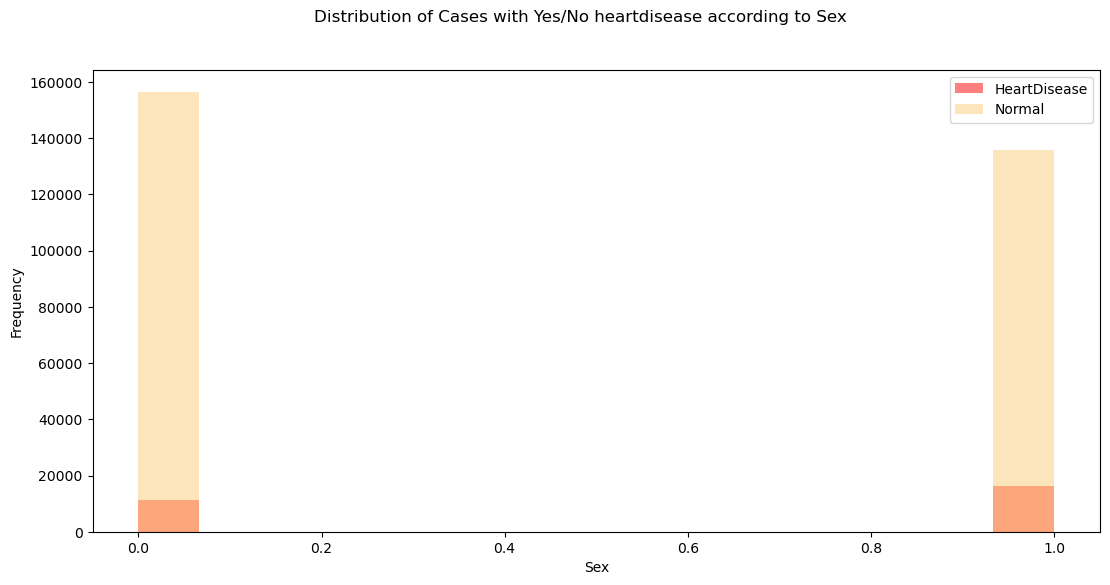

In [43]:


fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

- Remember that number one refers to men and 0 refers to women on the x-axis.
- Most cases of heart disease are <span style ='color:#0386f7de'>men </span>.
- Most cases that got no hart disease are <span style ='color:#0386f7de'>women </span>.

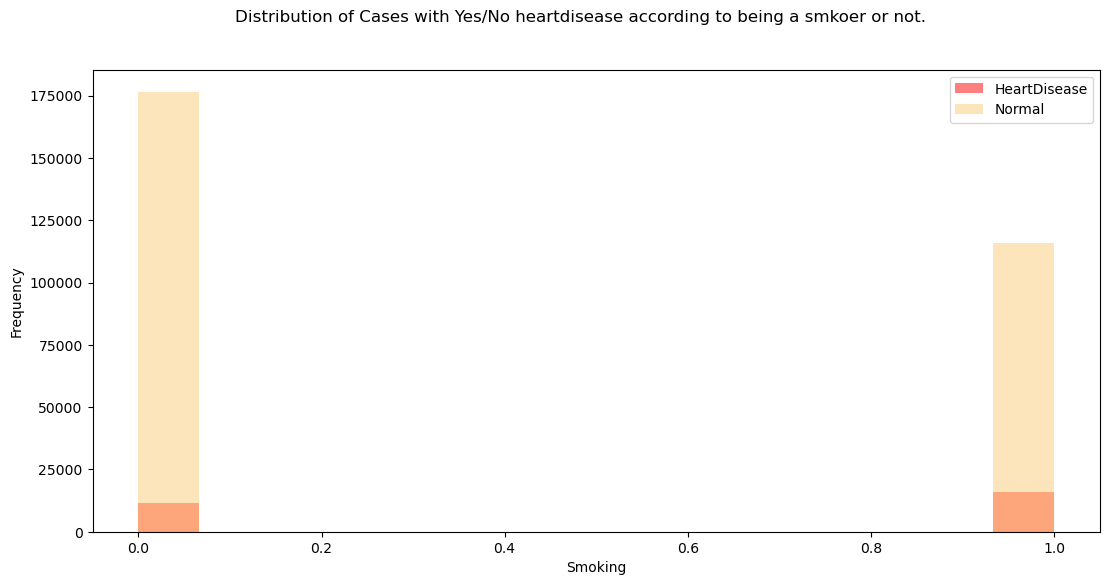

In [44]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

- For smokers, they are the largest group that suffers from heart disease.
- There are also cases of heart disease, although they don't  smoke, this is related to other factors.

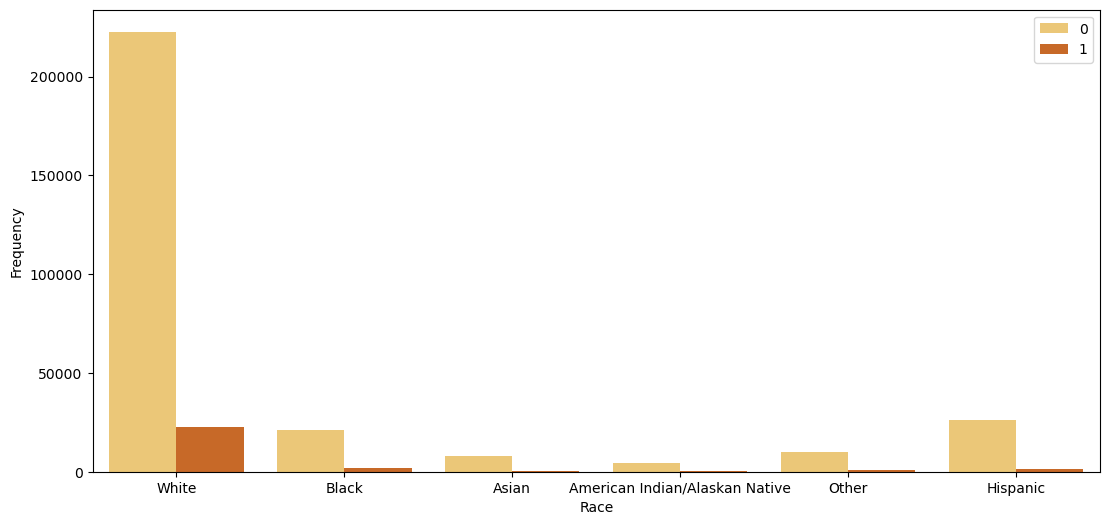

In [45]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

- 1 refers to heartdisease.
- 0 refers to normal state.
- We can see that white people are more susceptible to heart disease.

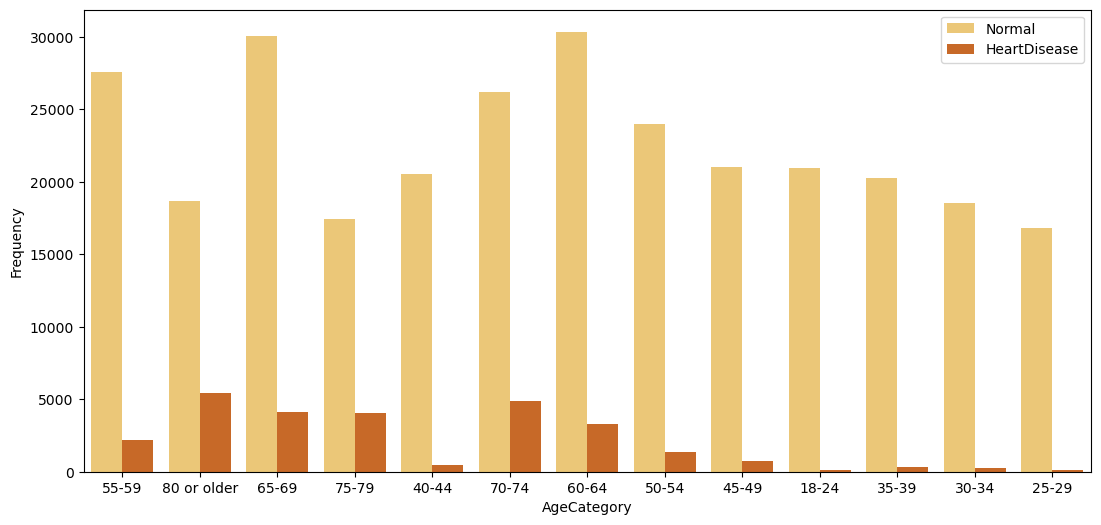

In [46]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- We can see that people who are 80 or older are more likely to get HeartDiseases.

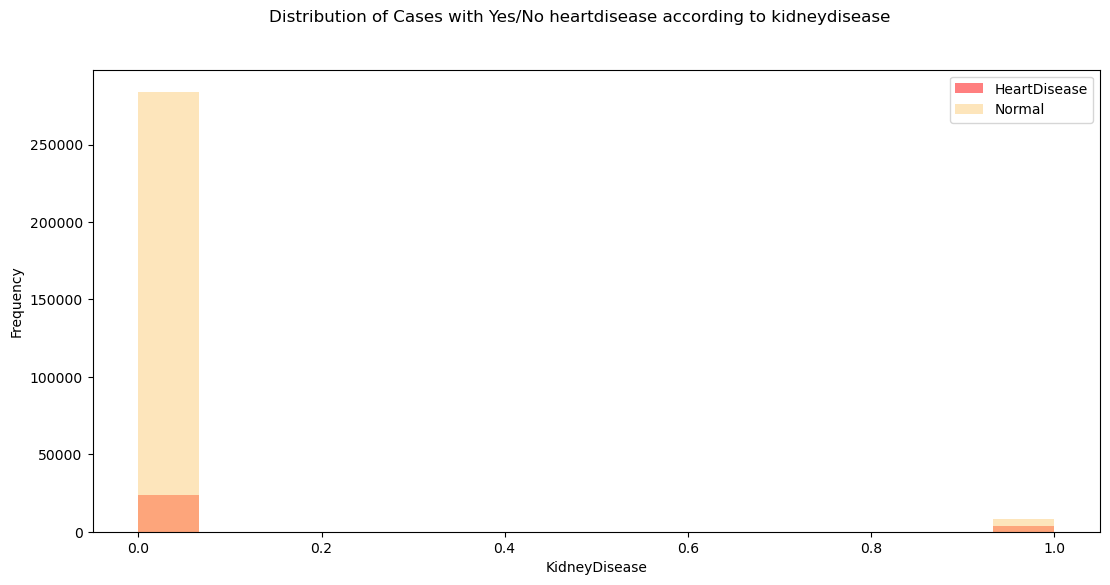

In [47]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

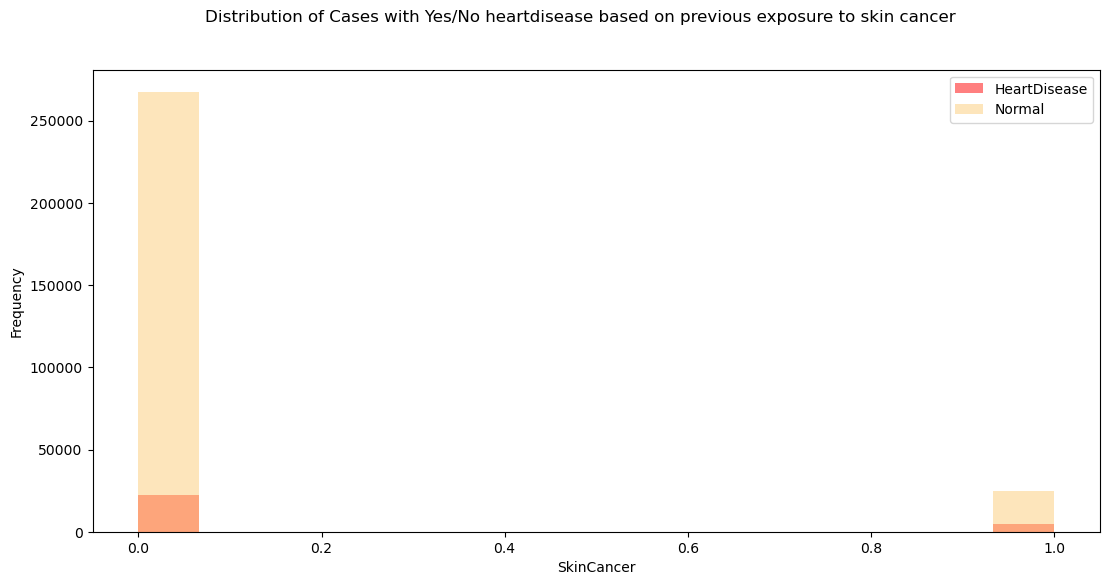

In [48]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

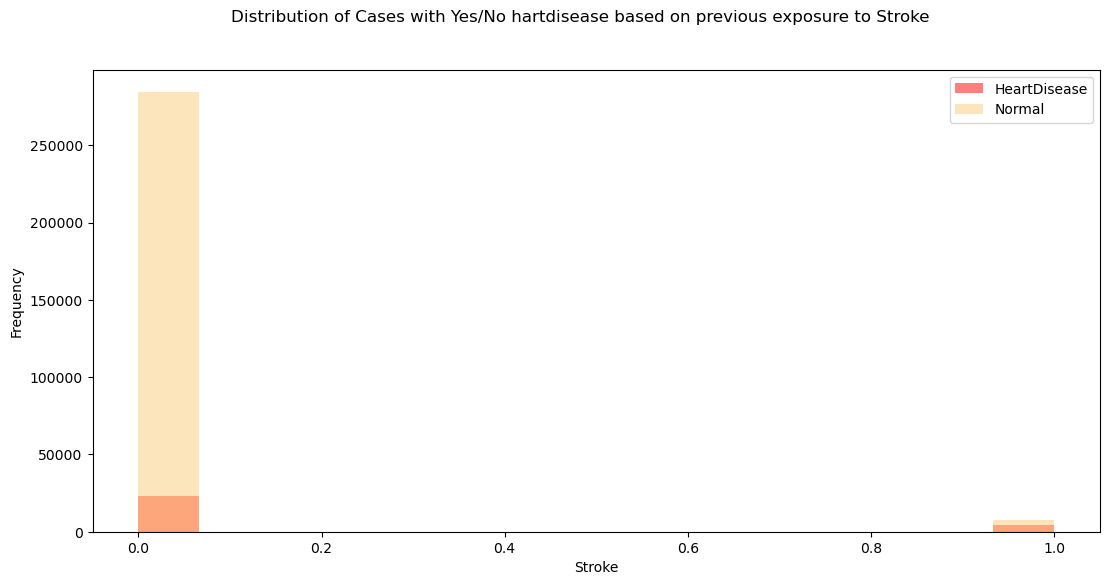

In [49]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

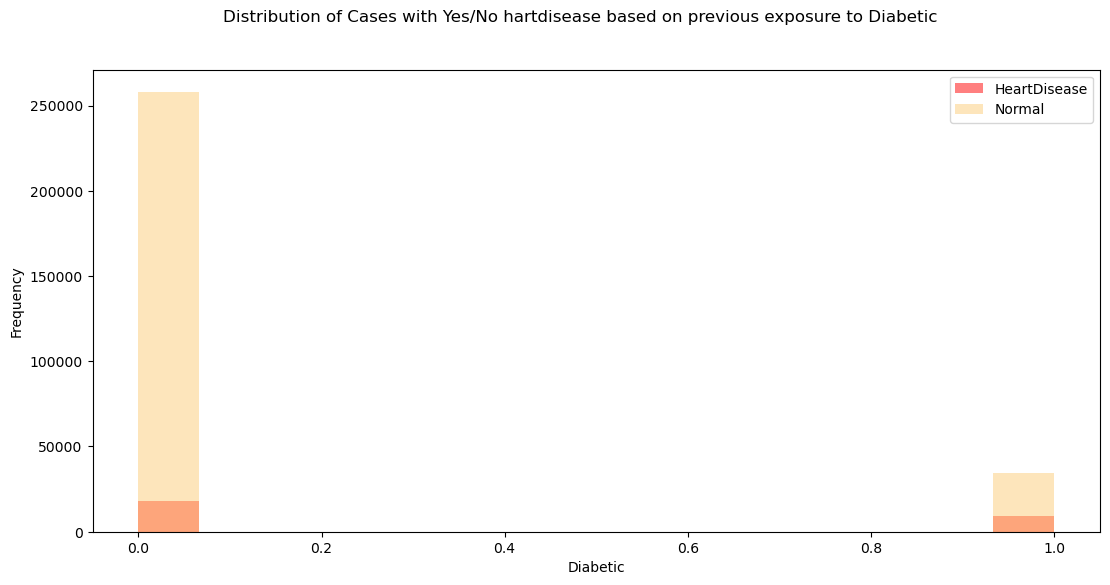

In [50]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\810047797.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\810047797.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


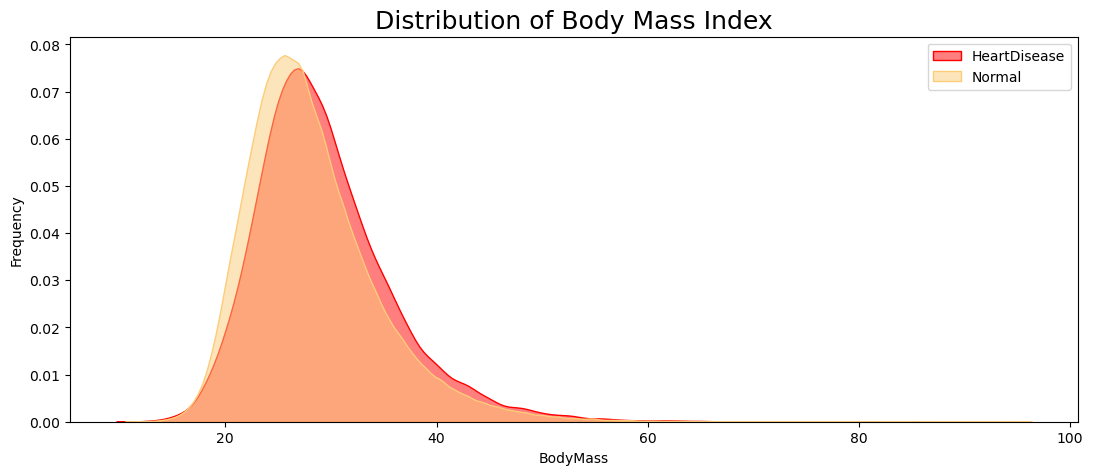

In [51]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()


![istockphoto-859587780-612x612.jpg](attachment:4c886a48-879e-4978-85a4-70c5947acf56.jpg)

C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\2242597631.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\2242597631.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


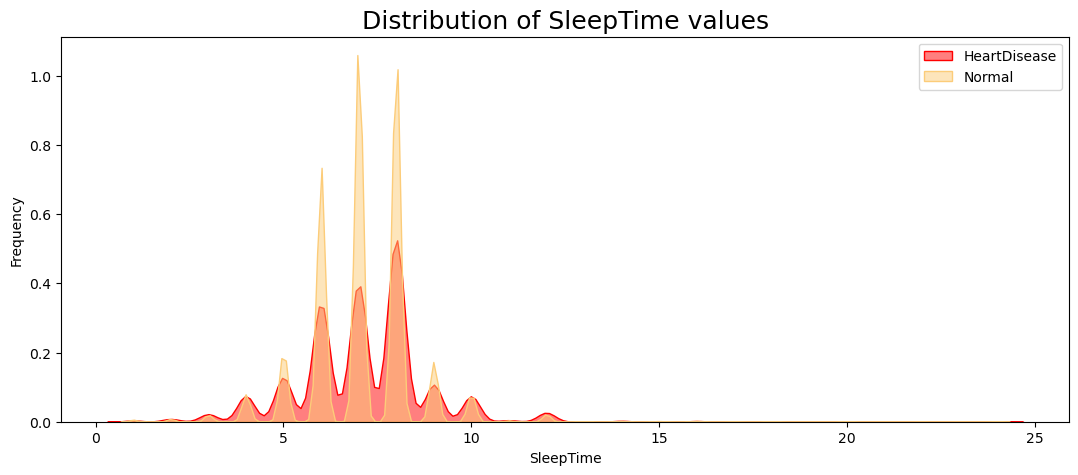

In [52]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\1514741577.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\1514741577.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


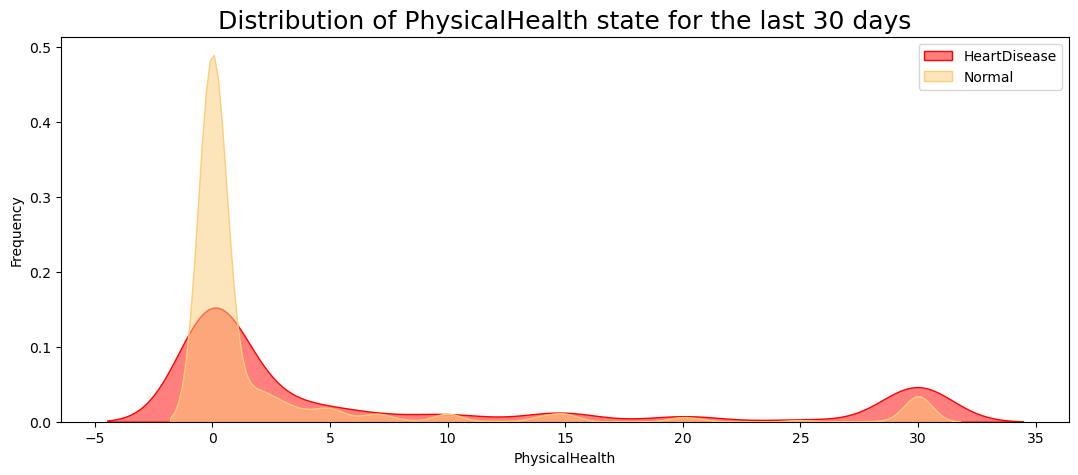

In [53]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\3430554068.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Dev Trivedi\AppData\Local\Temp\ipykernel_2888\3430554068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


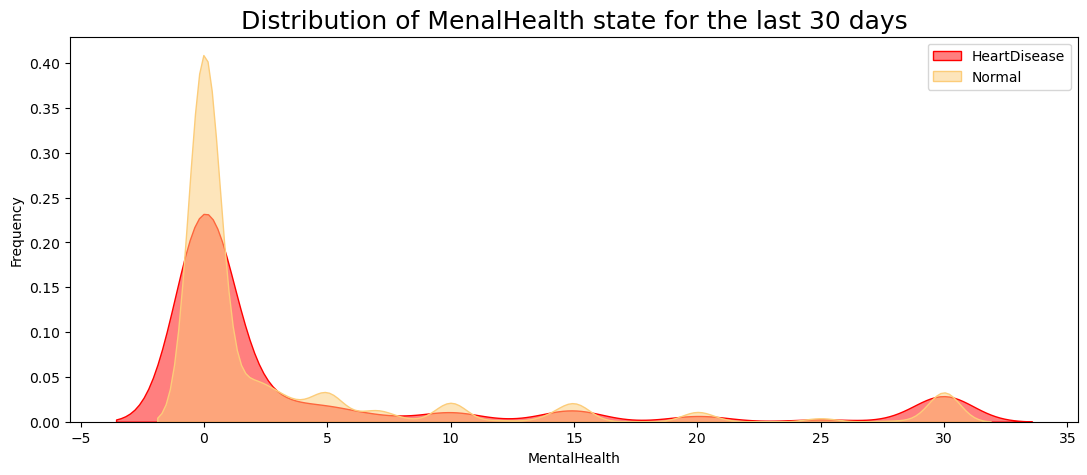

In [54]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

# <b><span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [55]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


# <b><span style='color:#0386f7de'>|</span> Data Preprocessing</b>

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['AgeCategory', 'Race', 'GenHealth']), 
    remainder='passthrough')

# Encode training data
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out()) 

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)



# Encode test data
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out()) 


# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)


# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

In [57]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)


# <b><span style='color:#0386f7de'>|</span> Modelling</b>

In [58]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [59]:
X_train

array([[-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       ...,
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ...,  2.54569927,
        -0.19512091, -0.32147374],
       [-0.26549634,  4.22578124, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374]])

In [60]:
# Building a model using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)


# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050016416766992
Precision: 0.3570780399274047
Recall: 0.14450973191333089
F1 Score: 0.2057516339869281
Cohens Kappa Score: 0.16477268538693723
Area Under Curve: 0.7190876830488478
Confusion Matrix:
 [[57096  1417]
 [ 4659   787]]


In [61]:

# Building Decision Tree model
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)
y_pred_tree = clf.predict(X_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8646945699588799
Precision: 0.232220367278798
Recall: 0.25541681968417185
F1 Score: 0.24326687653025533
Cohens Kappa Score: 0.1691567154170338
Area Under Curve: 0.589573855978808
Confusion Matrix:
 [[53914  4599]
 [ 4055  1391]]


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd





# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


class PrintEpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"EPOCH {epoch + 1}: accuracy = {logs['accuracy']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}")

# Train the model with the custom callback
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[PrintEpochCallback()]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob >= 0.5).astype(int).flatten()


Epoch 1/20


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6379/6396 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.2575EPOCH 1: accuracy = 0.9137, val_accuracy = 0.9161
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9076 - loss: 0.2575 - val_accuracy: 0.9161 - val_loss: 0.2267
Epoch 2/20
6389/6396 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 0.2306EPOCH 2: accuracy = 0.9152, val_accuracy = 0.9154
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9148 - loss: 0.2306 - val_accuracy: 0.9154 - val_loss: 0.2263
Epoch 3/20
6386/6396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9156 - loss: 0.2289EPOCH 3: accuracy = 0.9154, val_accuracy = 0.9148
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9156 - loss: 0.2289 - val_accuracy: 0.9148 - val_loss: 0.2264
Epoch 4/20
6354/6396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9161 - loss: 0.2272EPOCH 4: accuracy = 0.9156, val_accuracy = 0.9156
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9161 - loss: 0.2272 - val_accuracy: 0.9156 - 

# <b><span style='color:#0386f7de'>|</span> Comparison</b>

In [63]:
# Decision Tree Predictions
y_pred_tree = clf.predict(X_test)

# KNN Predictions
y_pred_knn = knn.predict(X_test)

# Neural Network Predictions
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob >= 0.5).astype(int).flatten()
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)
print('CONFUSION MATRIX FOR NEURAL NETWORK')
print(conf_matrix)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step
CONFUSION MATRIX FOR NEURAL NETWORK
[[58424    89]
 [ 5279   167]]


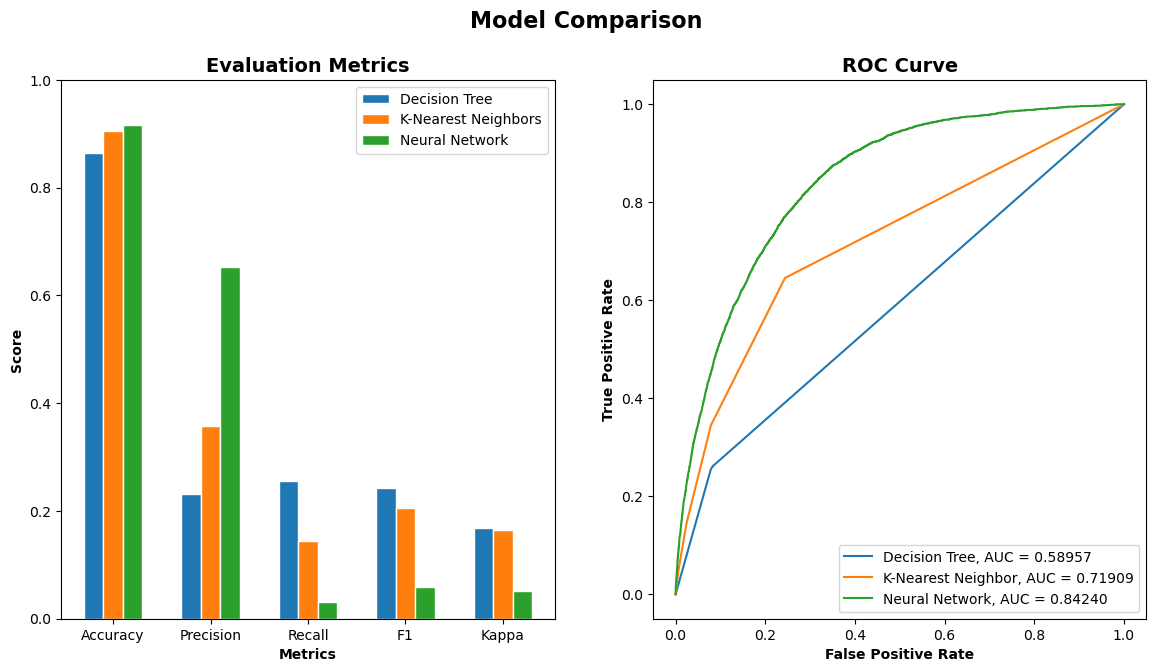

In [65]:
# Initialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## Set bar width
barWidth = 0.2

# Define scores for each model
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc



# Calculate performance metrics for the neural network model
nn_eval = {
    'acc': accuracy_score(y_test, y_pred_nn),
    'prec': precision_score(y_test, y_pred_nn),
    'rec': recall_score(y_test, y_pred_nn),
    'f1': f1_score(y_test, y_pred_nn),
    'kappa': cohen_kappa_score(y_test, y_pred_nn),
    'fpr': None,  # Will be set below
    'tpr': None,  # Will be set below
    'auc': None   # Will be set below
}

# Calculate ROC curve and AUC for the neural network
fpr, tpr, _ = roc_curve(y_test, y_pred_nn_prob)
nn_eval['fpr'] = fpr
nn_eval['tpr'] = tpr
nn_eval['auc'] = auc(fpr, tpr)

# Now we can use nn_eval['acc'], nn_eval['prec'], etc., as required in your plotting code
nn_score = [nn_eval['acc'], nn_eval['prec'], nn_eval['rec'], nn_eval['f1'], nn_eval['kappa']]



# Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the bar plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, nn_score, width=barWidth, edgecolor='white', label='Neural Network')

# Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + barWidth for r in range(len(clf_score))])
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

# Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, AUC = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, AUC = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(nn_eval['fpr'], nn_eval['tpr'], label='Neural Network, AUC = {:0.5f}'.format(nn_eval['auc']))

# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

# Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
